In [15]:
from pdf2image import convert_from_path
from pdf2image.exceptions import (
    PDFInfoNotInstalledError,
    PDFPageCountError,
    PDFSyntaxError
)
from pathlib import Path
from io import BytesIO
from openai import OpenAI
import base64
import os

In [11]:
def convert_doc_to_images(path):
    images = convert_from_path(path)
    return images

#RES_DIR = Path(__file__).resolve().parent / "resources"
FILE_DIR = "/home/wik34/git/AI-PDF-Agent/GPT-OCR/resources/general-01-small.pdf"

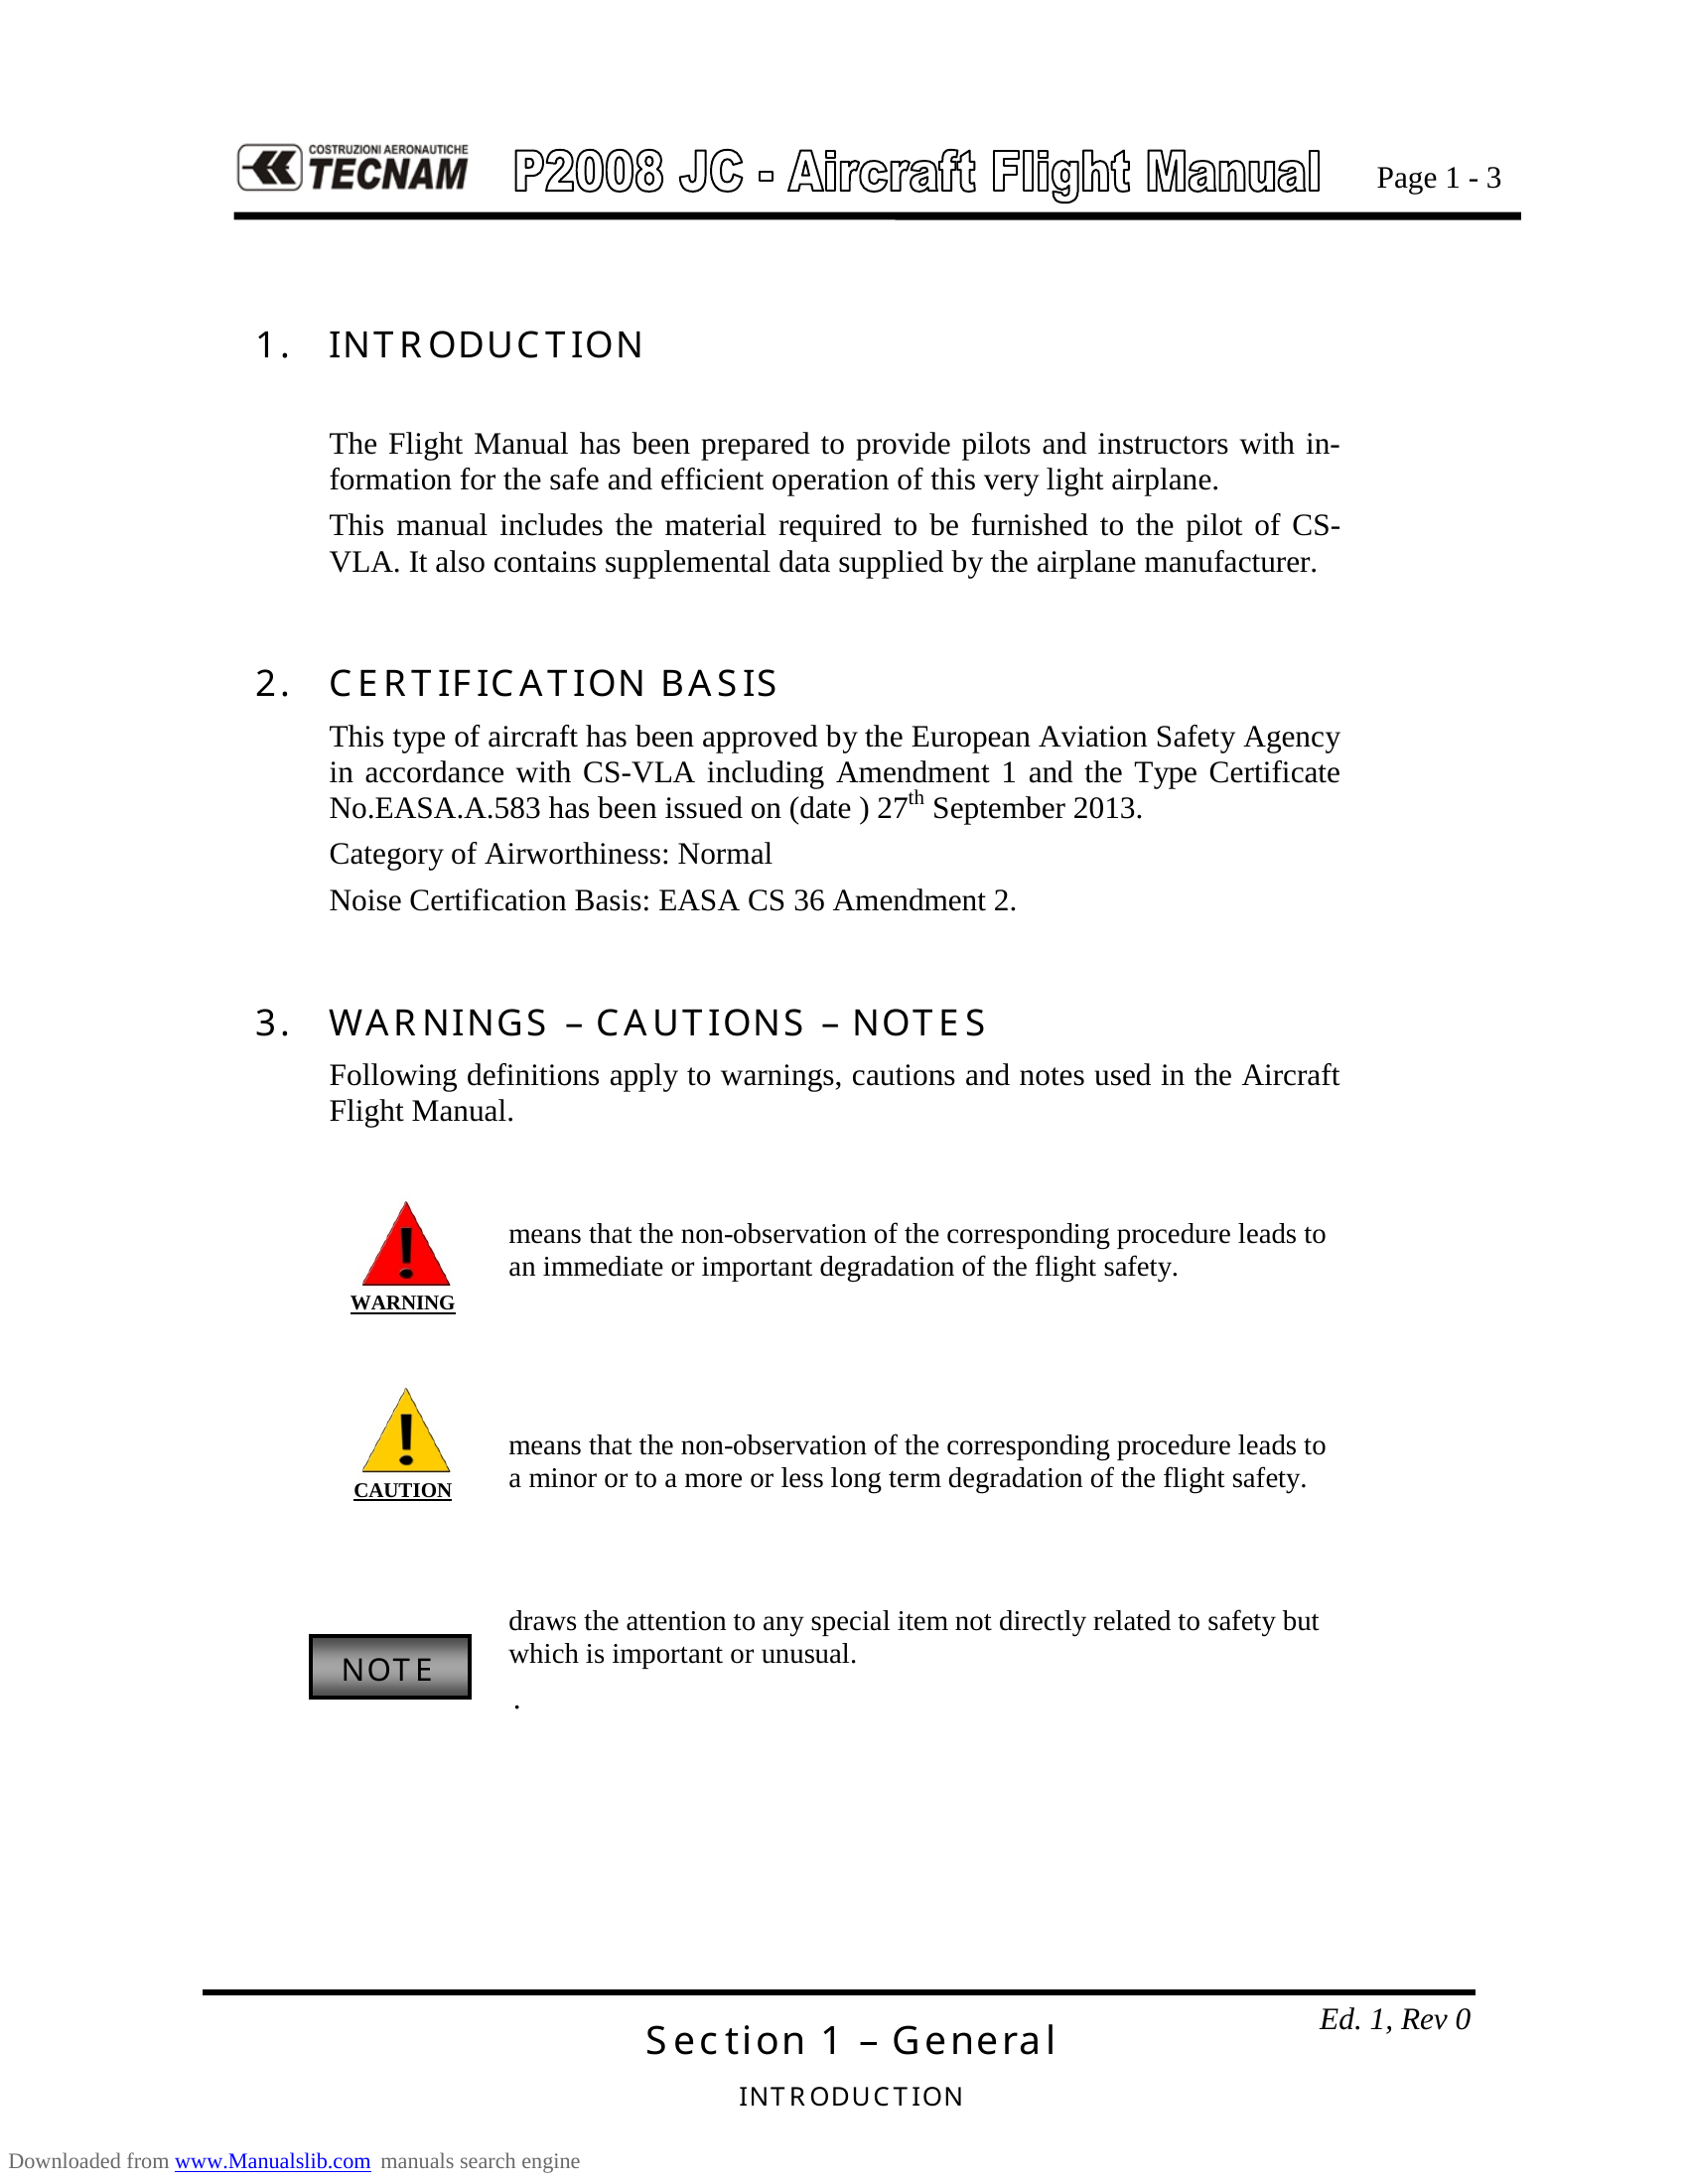

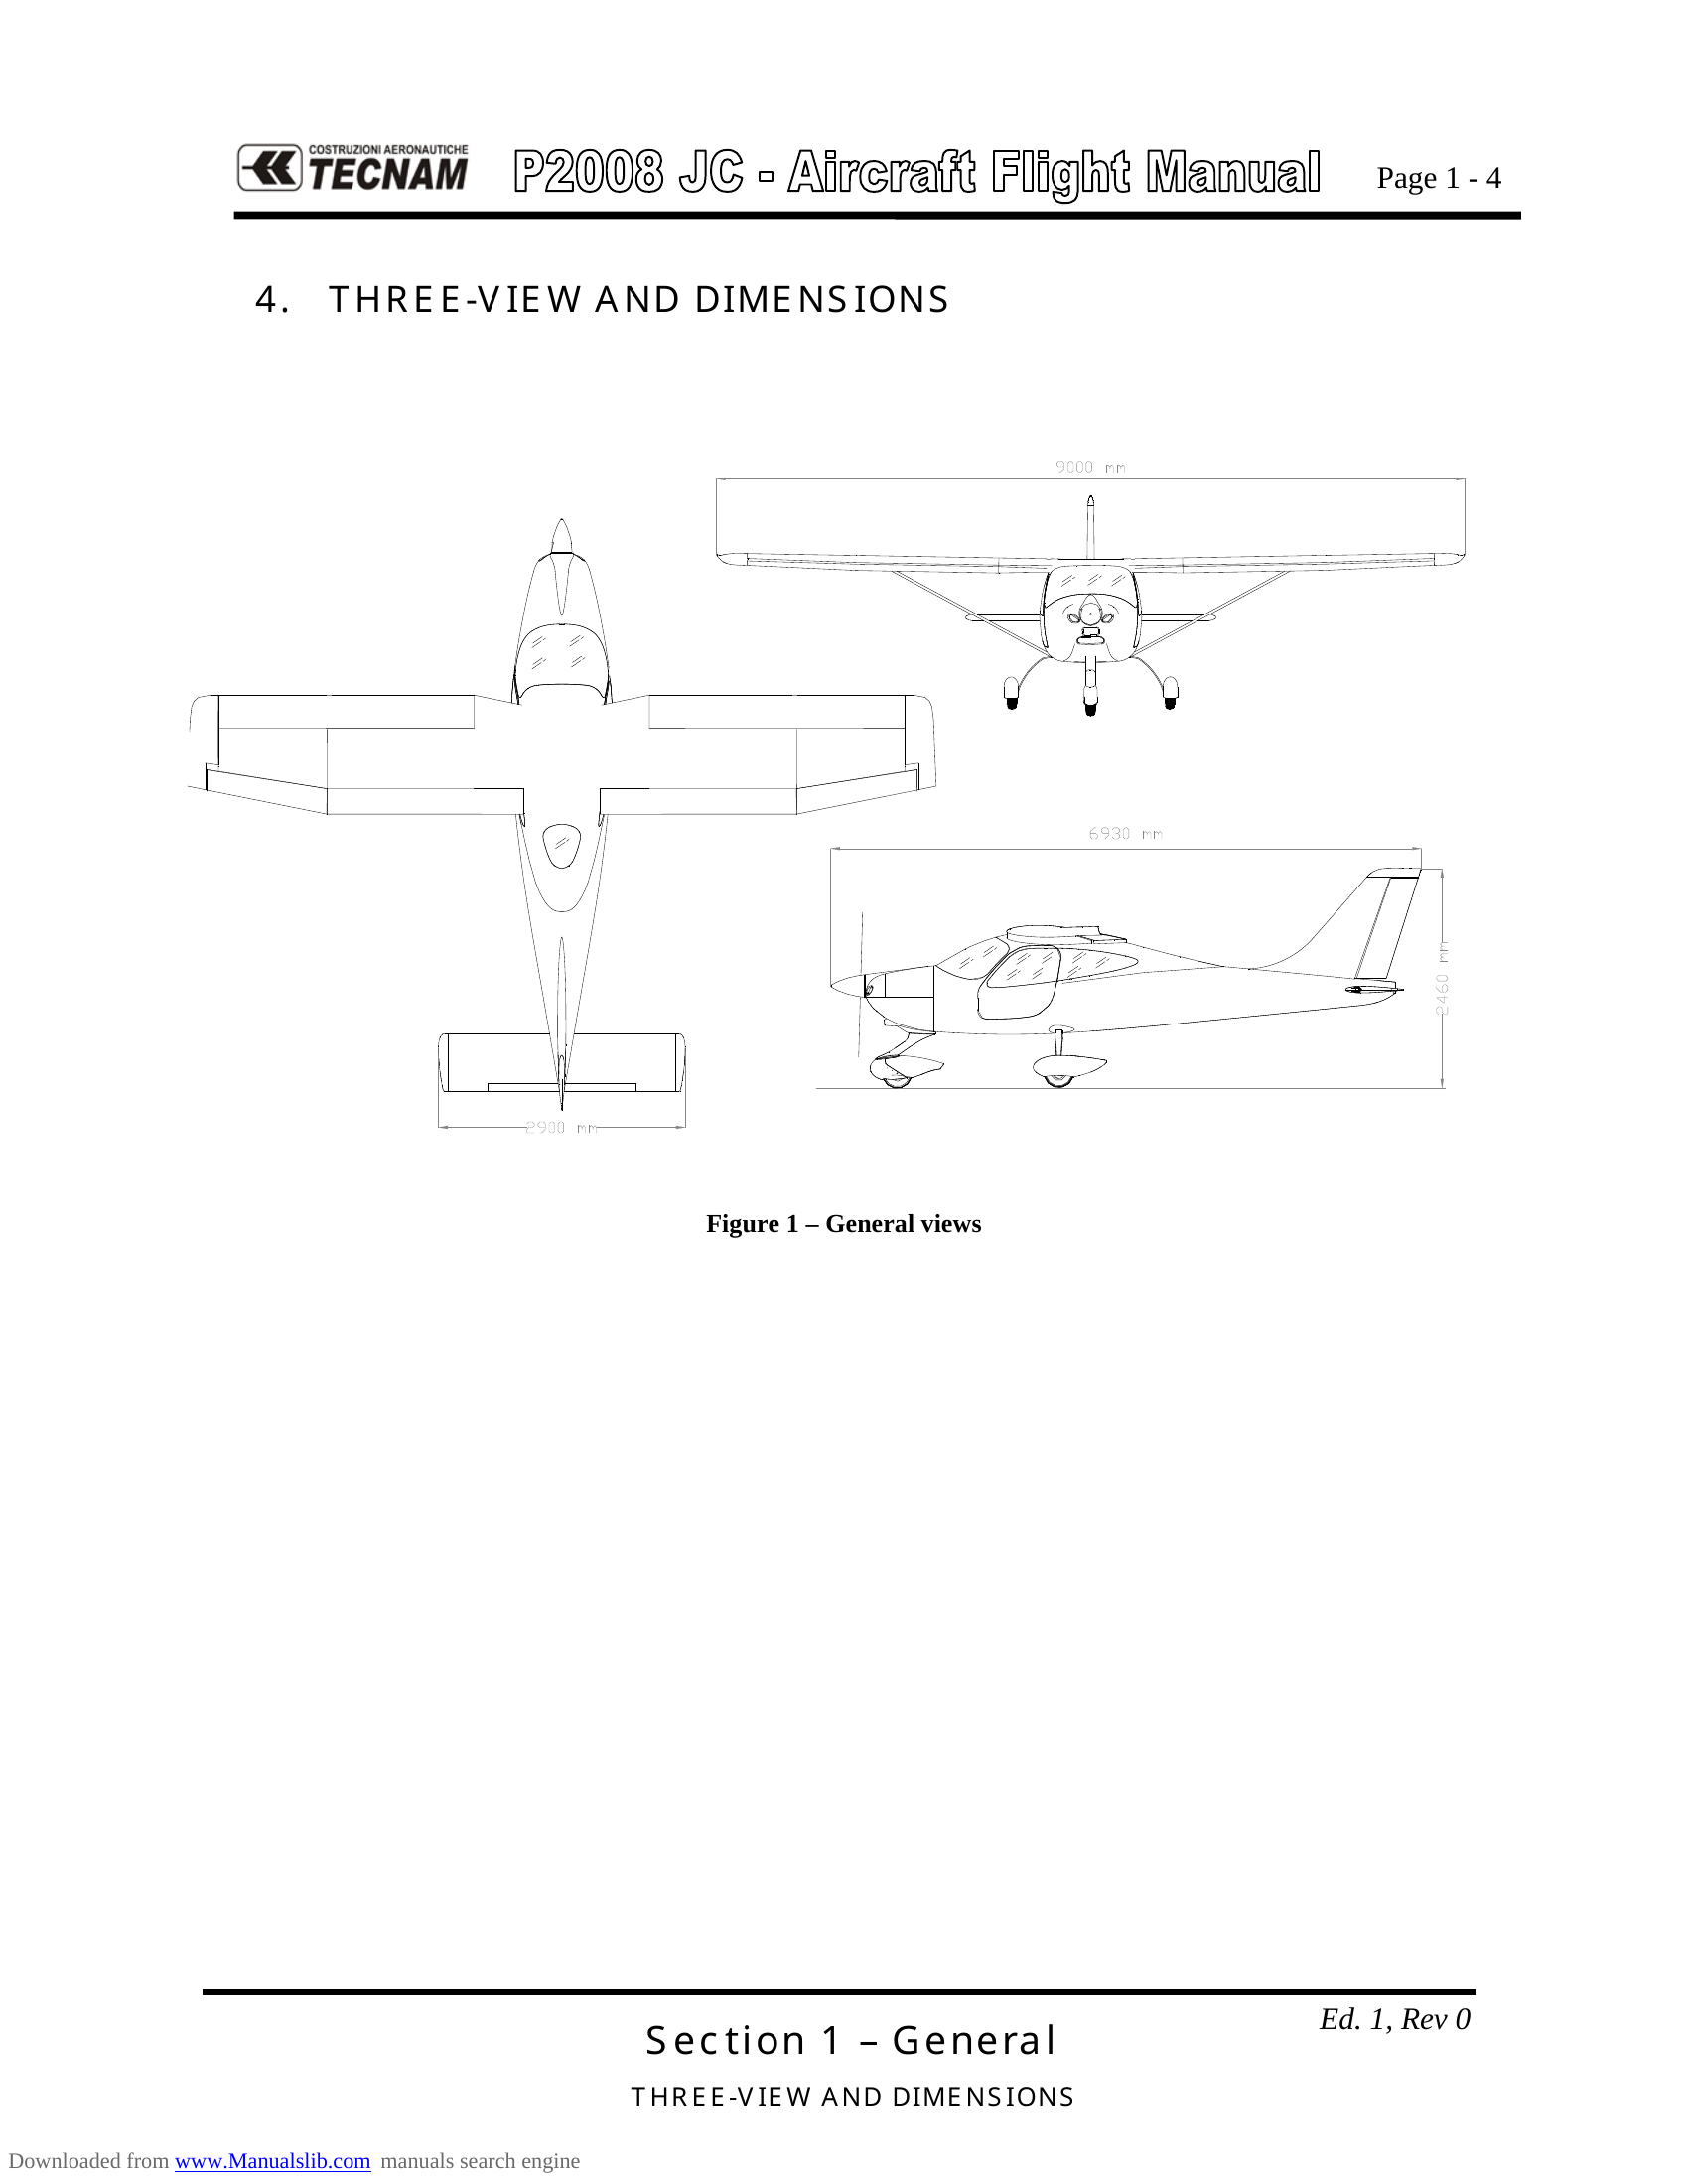

In [12]:
images = convert_doc_to_images(FILE_DIR)
for image in images:
    display(image)

In [38]:
import io
# Function to encode the image
def encode_image(image):
    # return base64.b64encode(image.read()).decode('utf-8')
    in_memory_file = io.BytesIO()

    # Save the image to the in-memory file
    image.save(in_memory_file, format='PNG')

    # Reset the file pointer to the beginning
    in_memory_file.seek(0)

    # Read the bytes from the in-memory file
    image_bytes = in_memory_file.read()

    # Encode the bytes to Base64
    return base64.b64encode(image_bytes).decode('utf-8')

In [39]:
MODEL="gpt-4o-mini"
PROMPT = """
You will be provided with an image of a pdf page or a slide. Your goal is to talk about the content that you see, in technical terms, as if you were delivering a presentation.

If there are diagrams, describe the diagrams and explain their meaning.
For example: if there is a diagram describing a process flow, say something like "the process flow starts with X then we have Y and Z..."

If there are tables, describe logically the content in the tables
For example: if there is a table listing items and prices, say something like "the prices are the following: A for X, B for Y..."

DO NOT include terms referring to the content format
DO NOT mention the content type - DO focus on the content itself
For example: if there is a diagram/chart and text on the image, talk about both without mentioning that one is a chart and the other is text.
Simply describe what you see in the diagram and what you understand from the text.

You should keep it concise, but keep in mind your audience cannot see the image so be exhaustive in describing the content.

Exclude elements that are not relevant to the content:
DO NOT mention page numbers or the position of the elements on the image.

------

If there is an identifiable title, identify the title to give the output in the following format:

{TITLE}

{Content description}

If there is no clear title, simply return the content description.
"""

In [40]:
import requests
def analyze_image(api_key, base64_image):

    headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"
    }

    payload = {
    "model": MODEL,
    "messages": [
        {
        "role": "user",
        "content": [
            {
            "type": "text",
            "text": PROMPT
            },
            {
            "type": "image_url",
            "image_url": {
                "url": f"data:image/jpeg;base64,{base64_image}"
            }
            }
        ]
        }
    ],
    "max_tokens": 300
    }

    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

    return(response.json())

In [41]:
from dotenv import load_dotenv
load_dotenv()
openai_api_key = os.getenv("OPENAI-API-KEY")

In [42]:
img = images[0]
base64_image = encode_image(img)
print(analyze_image(openai_api_key, base64_image))

{'id': 'chatcmpl-9zROG5SXdTQ1cCxs9OmBcCTcX97Ek', 'object': 'chat.completion', 'created': 1724430324, 'model': 'gpt-4o-mini-2024-07-18', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': '**P2008 JC - Aircraft Flight Manual**\n\nThe content begins with an introduction that outlines the purpose of the Flight Manual, which is designed to provide pilots and instructors with vital information for the safe and efficient operation of the aircraft. It mentions that this manual contains material required for pilots operating the CS-VLA and includes supplemental data from the aircraft manufacturer.\n\nNext, it details the certification basis, indicating that the aircraft has been approved by the European Aviation Safety Agency (EASA) under the standards for Very Light Aircraft (CS-VLA). The document notes that a specific type certificate was issued on September 27, 2013, categorizing the airworthiness as "Normal" and indicating noise certification basis according to EASA stand

In [43]:
import json
img = images[1]
base64_image = encode_image(img)
ans = analyze_image(openai_api_key, base64_image)
print(json.dumps(ans, indent=4))

{
    "id": "chatcmpl-9zRRuaTTqdJeVg85tMmHgQsBPP7wo",
    "object": "chat.completion",
    "created": 1724430550,
    "model": "gpt-4o-mini-2024-07-18",
    "choices": [
        {
            "index": 0,
            "message": {
                "role": "assistant",
                "content": "**THREE-VIEW AND DIMENSIONS**\n\nThis section features a comprehensive illustration of the aircraft from three different perspectives: top view, front view, and side view, providing critical dimensional data. \n\n- The top view indicates the overall wing span, measuring 9000 mm, showing the aircraft\u2019s silhouette from above, which includes the layout of the wings and tail.\n  \n- The front view, displaying a width of 6930 mm, provides insight into the design of the nose and cockpit area, emphasizing the aircraft's aerodynamic profile.\n\n- The side view illustrates the height of the aircraft at 1480 mm and also provides details about the tail configuration and landing gear placement.\n\nThese 